In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
dataset_columns = pd.read_csv('../datasets/restaurant_db_data_dictionary.csv')
menu_items = pd.read_csv('../datasets/menu_items.csv')
order_details = pd.read_csv('../datasets/order_details.csv')


In [ ]:
dataset_columns

In [ ]:
print(menu_items.shape)
menu_items.sample(10)

In [ ]:
print(order_details.shape)
order_details.head()

In [ ]:
order_details.head()

In [ ]:
order_details.info()

In [ ]:
order_details.isna().sum()

In [10]:
order_details.dropna(inplace=True)
order_details.drop_duplicates(inplace=True)
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12097 non-null  int64  
 1   order_id          12097 non-null  int64  
 2   order_date        12097 non-null  object 
 3   order_time        12097 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 567.0+ KB


In [11]:
order_details['item_id'] = order_details['item_id'].astype('int64')
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  12097 non-null  int64 
 1   order_id          12097 non-null  int64 
 2   order_date        12097 non-null  object
 3   order_time        12097 non-null  object
 4   item_id           12097 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 567.0+ KB


In [12]:
order_details['order_datetime'] = pd.to_datetime(order_details['order_date'] + ' ' + order_details['order_time'], format='%m/%d/%y %I:%M:%S %p')
order_details = order_details.drop(['order_date', 'order_time'], axis=1)
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   item_id           12097 non-null  int64         
 3   order_datetime    12097 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 472.5 KB


- ¿Qué categorías venden más, qué día y a qué hora por mes?
- ¿Qué categorías suelen pedirse juntas en la misma orden? Por día, semana y mes
- ¿Qué productos son los más vendidos cada día, cada semana y cada mes?

In [13]:
union = menu_items.merge(order_details, how='inner', left_on='menu_item_id', right_on='item_id')
union.head()

,menu_item_id,item_name,category,price,order_details_id,order_id,item_id,order_datetime
0,101,Hamburger,American,12.95,11,6,101,2023-01-01 12:29:36
1,101,Hamburger,American,12.95,26,11,101,2023-01-01 13:02:59
2,101,Hamburger,American,12.95,43,17,101,2023-01-01 13:53:00
3,101,Hamburger,American,12.95,63,24,101,2023-01-01 14:23:01
4,101,Hamburger,American,12.95,71,27,101,2023-01-01 15:11:17


In [14]:
union.drop(['menu_item_id', 'order_details_id'], axis=1, inplace=True)
union.sample(5)

,item_name,category,price,order_id,item_id,order_datetime
8159,Steak Torta,Mexican,13.95,4735,120,2023-03-21 13:20:32
11490,Chicken Parmesan,Italian,17.95,2622,131,2023-02-13 16:06:27
11150,Shrimp Scampi,Italian,19.95,1861,130,2023-02-01 13:21:23
10974,Mushroom Ravioli,Italian,15.50,3901,129,2023-03-07 16:34:59
8044,Steak Torta,Mexican,13.95,3315,120,2023-02-25 16:28:11


In [15]:
union['day_of_week'] = union['order_datetime'].dt.day_name()
categories_by_day = union.groupby(['day_of_week', 'category'], as_index=False)['price'].sum()
categories_by_day

,day_of_week,category,price
0,Friday,American,3934.50
1,Friday,Asian,6979.45
2,Friday,Italian,7135.65
3,Friday,Mexican,5658.35
4,Monday,American,4552.95
5,Monday,Asian,7828.45
6,Monday,Italian,8183.85
7,Monday,Mexican,5442.20
8,Saturday,American,3823.15
9,Saturday,Asian,6154.00


In [16]:
total_by_day = union.groupby(['day_of_week'], as_index=False)['price'].sum()
total_by_day.sort_values(by='price', ascending=False).reset_index(drop=True)

,day_of_week,price
0,Monday,26007.45
1,Friday,23707.95
2,Tuesday,23356.00
3,Sunday,23226.45
4,Thursday,21846.85
5,Saturday,21170.90
6,Wednesday,19902.30


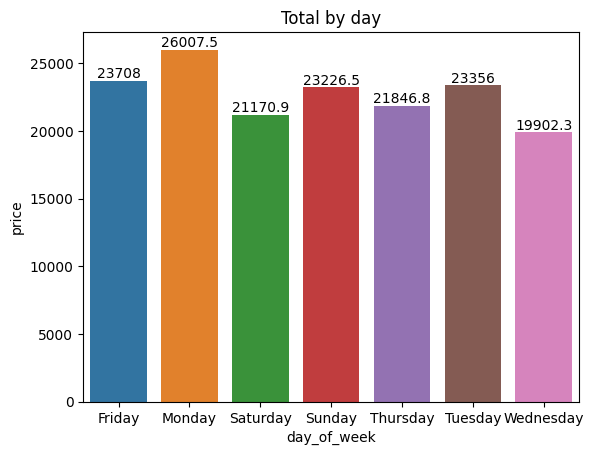

In [17]:
ax = sns.barplot(total_by_day, x="day_of_week", y="price", hue='day_of_week', estimator="sum", errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Total by day')

plt.show()

In [ ]:
union['order_datetime'].dt.time.sort_values()

In [18]:
union['hour_minute'] = union['order_datetime'].dt.hour.astype(str).str.zfill(2) + ':' + union['order_datetime'].dt.minute.astype(str).str.zfill(2)
union['hour_minute'] = pd.to_datetime(union['hour_minute'], format='%H:%M')
time_bins = [
    pd.to_datetime(f"{00}:{00}", format='%H:%M'),
    pd.to_datetime(f"{10}:{00}", format='%H:%M'),
    pd.to_datetime(f"{12}:{00}", format='%H:%M'),
    pd.to_datetime(f"{14}:{00}", format='%H:%M'),
    pd.to_datetime(f"{17}:{00}", format='%H:%M'),
    pd.to_datetime(f"{19}:{00}", format='%H:%M'),
    pd.to_datetime(f"{23}:{59}", format='%H:%M')
]
time_labels = ['Night', 'Morning', 'Noon', 'Afternoon', 'Early evening', 'Evening']
union['time_range'] = pd.cut(union['hour_minute'], bins=time_bins, labels=time_labels, right=False)
union.drop('hour_minute', axis=1, inplace=True)
union.sample(10)

,item_name,category,price,order_id,item_id,order_datetime,day_of_week,time_range
10133,Fettuccine Alfredo,Italian,14.50,3325,126,2023-02-25 18:00:51,Saturday,Early evening
10144,Fettuccine Alfredo,Italian,14.50,3509,126,2023-02-28 19:05:49,Tuesday,Evening
1425,Hot Dog,American,9.00,4808,103,2023-03-22 18:57:35,Wednesday,Early evening
9308,Spaghetti,Italian,14.50,2232,124,2023-02-06 20:50:02,Monday,Evening
6187,Potstickers,Asian,9.00,4927,114,2023-03-24 19:38:31,Friday,Evening
3730,Tofu Pad Thai,Asian,14.50,5160,108,2023-03-28 16:53:33,Tuesday,Afternoon
6026,Potstickers,Asian,9.00,522,114,2023-01-09 14:09:33,Monday,Afternoon
11190,Shrimp Scampi,Italian,19.95,2843,130,2023-02-17 13:36:33,Friday,Noon
1648,Veggie Burger,American,10.50,4298,104,2023-03-13 22:18:17,Monday,Evening
6590,Chicken Burrito,Mexican,12.95,436,117,2023-01-08 12:07:21,Sunday,Noon


In [19]:
union['time_range'] = union['time_range'].cat.remove_unused_categories()
categories_by_time_range = union.groupby(['time_range', 'category'], as_index=False)['price'].sum()
categories_by_time_range

C:\Users\andre\AppData\Local\Temp\ipykernel_8644\2085999429.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categories_by_time_range = union.groupby(['time_range', 'category'], as_index=False)['price'].sum()


,time_range,category,price
0,Morning,American,1448.75
1,Morning,Asian,2701.50
2,Morning,Italian,2134.95
3,Morning,Mexican,1900.65
4,Noon,American,7729.35
5,Noon,Asian,12000.10
6,Noon,Italian,13404.55
7,Noon,Mexican,9224.65
8,Afternoon,American,6280.05
9,Afternoon,Asian,10672.80


In [21]:
union['time_range'] = union['time_range'].cat.remove_unused_categories()
union['time_range'].value_counts()

time_range
Noon             3217
Evening          2872
Afternoon        2734
Early evening    2645
Morning           629
Name: count, dtype: int64

In [22]:
total_by_time_range = union.groupby(['time_range', 'category'], as_index=False)['price'].sum()
total_by_time_range.sort_values(by='price', ascending=False).reset_index(drop=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_8644\1010250226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_time_range = union.groupby(['time_range', 'category'], as_index=False)['price'].sum()


,time_range,category,price
0,Noon,Italian,13404.55
1,Noon,Asian,12000.10
2,Evening,Italian,11893.50
3,Afternoon,Italian,11250.10
4,Evening,Asian,11101.20
5,Early evening,Italian,10779.60
6,Afternoon,Asian,10672.80
7,Early evening,Asian,10245.05
8,Noon,Mexican,9224.65
9,Evening,Mexican,8255.80


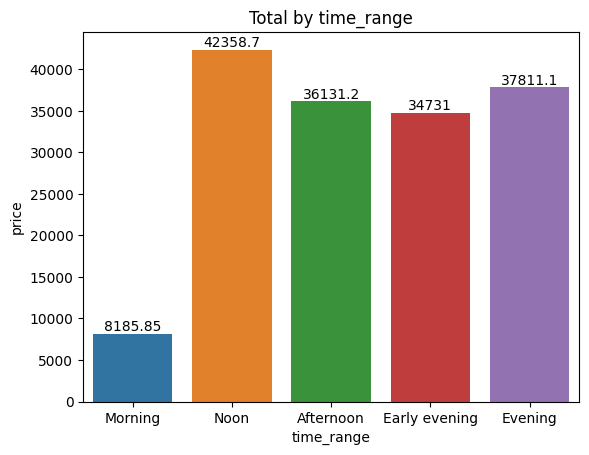

In [23]:
ax = sns.barplot(total_by_time_range, x="time_range", y="price", hue='time_range', estimator="sum", errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Total by time_range')
plt.show()

In [24]:
total_by_time_range_by_day = union.groupby(['day_of_week', 'time_range', 'category'], as_index=False)['price'].sum()
total_by_time_range_by_day.sort_values(by='price', ascending=False).reset_index(drop=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_8644\2923499057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_time_range_by_day = union.groupby(['day_of_week', 'time_range', 'category'], as_index=False)['price'].sum()


,day_of_week,time_range,category,price
0,Monday,Evening,Italian,2601.60
1,Sunday,Noon,Italian,2560.40
2,Tuesday,Evening,Italian,2459.90
3,Monday,Evening,Asian,2344.00
4,Friday,Noon,Asian,2304.95
...,...,...,...,...
135,Sunday,Morning,American,195.20
136,Friday,Morning,American,193.60
137,Wednesday,Morning,American,174.50
138,Monday,Morning,American,161.80


In [25]:
union['month'] = union['order_datetime'].dt.month

¿Por qué quiero saber qué día se vende más cada categoría?

¿Por qué quiero saber a qué hora se vende más cada categoría?

In [ ]:
#Cuál fue el total de ventas por día, rango, categoría
pd.set_option('display.max_rows', None)
table = pd.pivot_table(union, values='price', index=['month', 'day_of_week', 'time_range'], columns='category', aggfunc="sum")
table

In [26]:
enero = union[union['month'] == 1]
febrero = union[union['month'] == 2]
marzo = union[union['month'] == 3]

In [ ]:
table_enero = pd.pivot_table(enero, values='price', index=['day_of_week', 'time_range'], columns=['category'], aggfunc="sum")
table_febrero = pd.pivot_table(febrero, values='price', index=['day_of_week', 'time_range'], columns=['category'], aggfunc="sum")
table_marzo = pd.pivot_table(marzo, values='price', index=['day_of_week', 'time_range'], columns=['category'], aggfunc="sum")

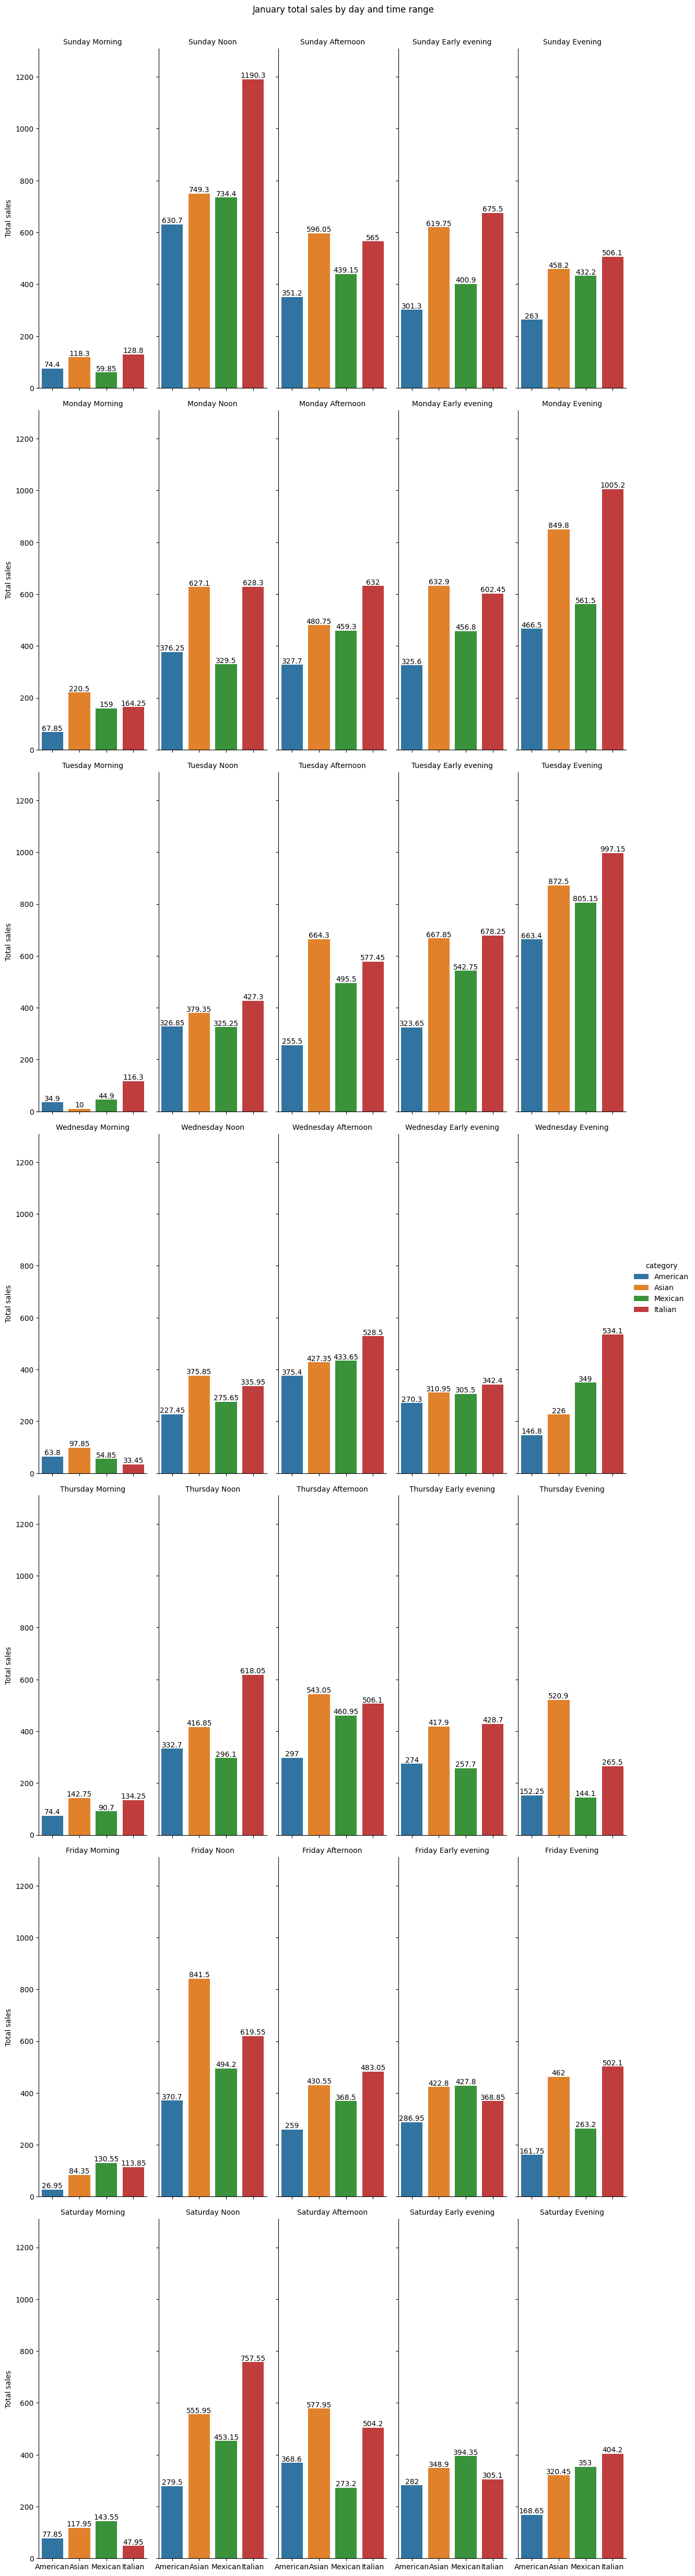

In [27]:
g = sns.catplot(
    data=enero,
    x="category",
    y="price",
    col="time_range",
    row='day_of_week',
    hue='category',
    kind="bar",
    height=7,
    aspect=.35,
    estimator="sum",
    errorbar=None,
    legend=True
)
g.set_axis_labels("", "Total sales")
g.set_xticklabels(list(enero.category.unique()))
g.set_titles("{row_name} {col_name}")
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.1)

g.fig.suptitle('January total sales by day and time range', y=1.01)
fig_name = f"january-{datetime.strftime(datetime.now(), format='%d-%m-%y-%H-%M')}"
plt.savefig(fname=f'../figures/{fig_name}.png', format='png', dpi=300)
plt.show()

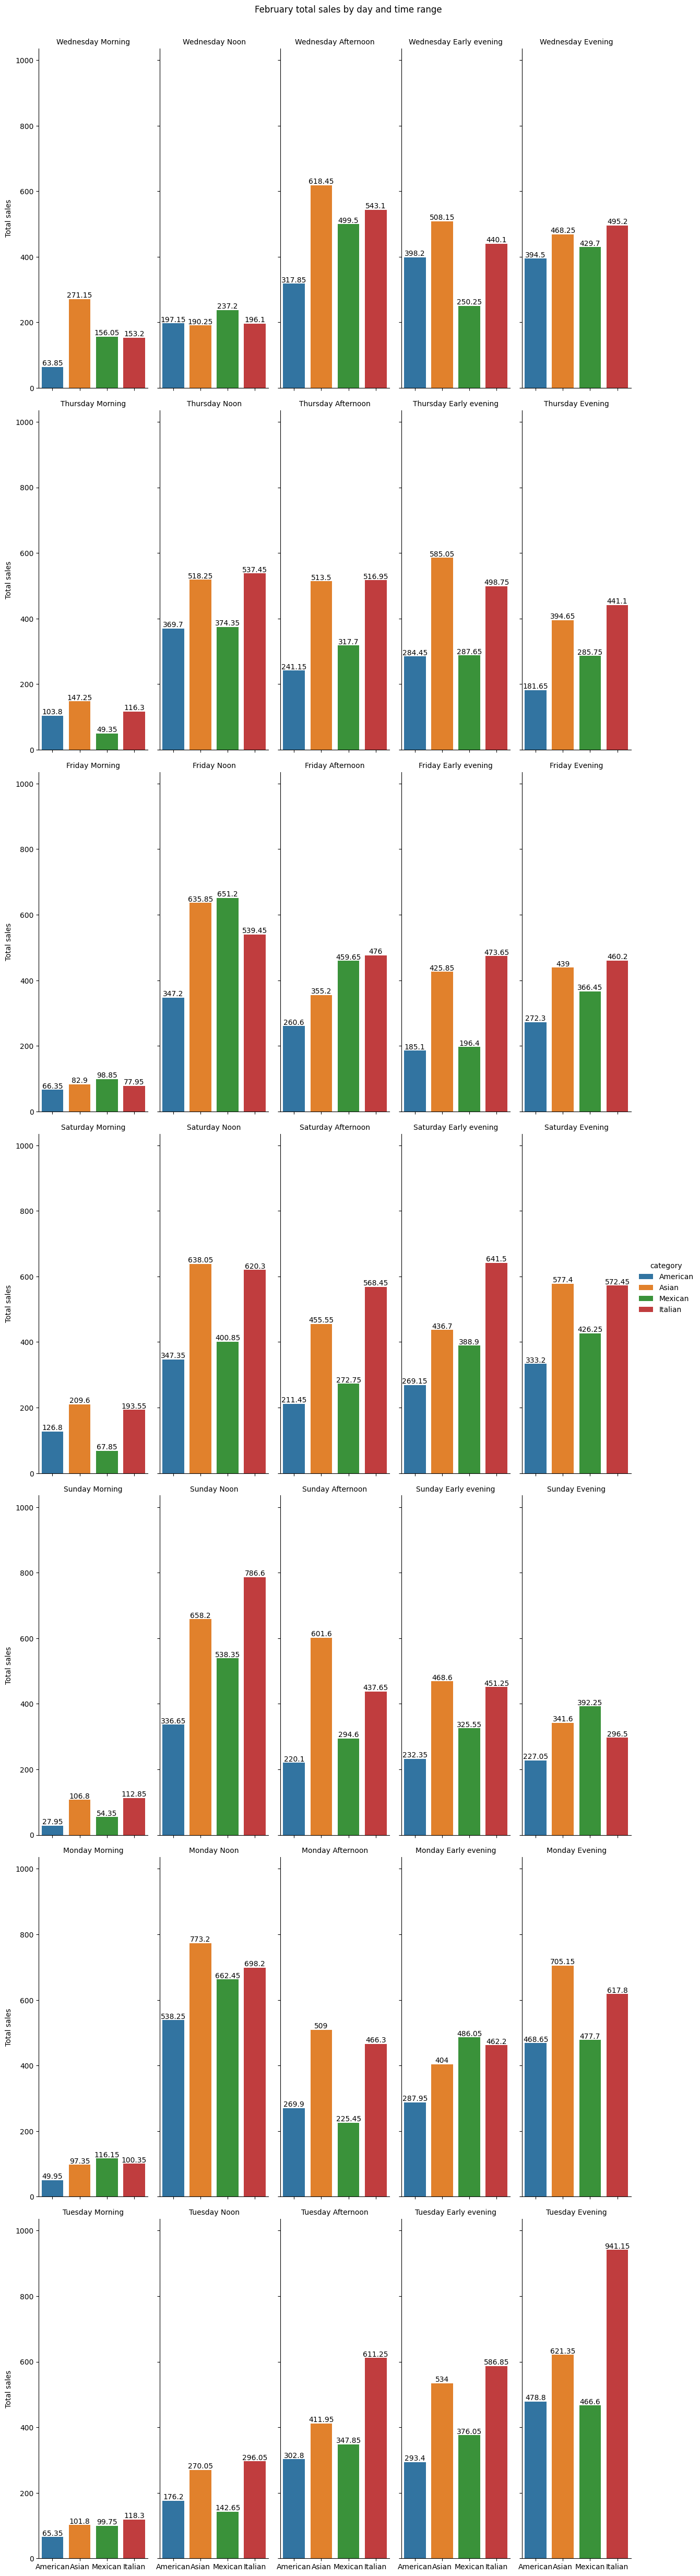

In [28]:
g = sns.catplot(
    data=febrero,
    x="category",
    y="price",
    col="time_range",
    row='day_of_week',
    hue='category',
    kind="bar",
    height=7,
    aspect=.35,
    estimator="sum",
    errorbar=None,
    legend=True
)
g.set_axis_labels("", "Total sales")
g.set_xticklabels(list(febrero.category.unique()))
g.set_titles("{row_name} {col_name}")
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.1)

g.fig.suptitle('February total sales by day and time range', y=1.01)
fig_name = f"february-{datetime.strftime(datetime.now(), format='%d-%m-%y-%H-%M')}"
plt.savefig(fname=f'../figures/{fig_name}.png', format='png', dpi=300)
plt.show()

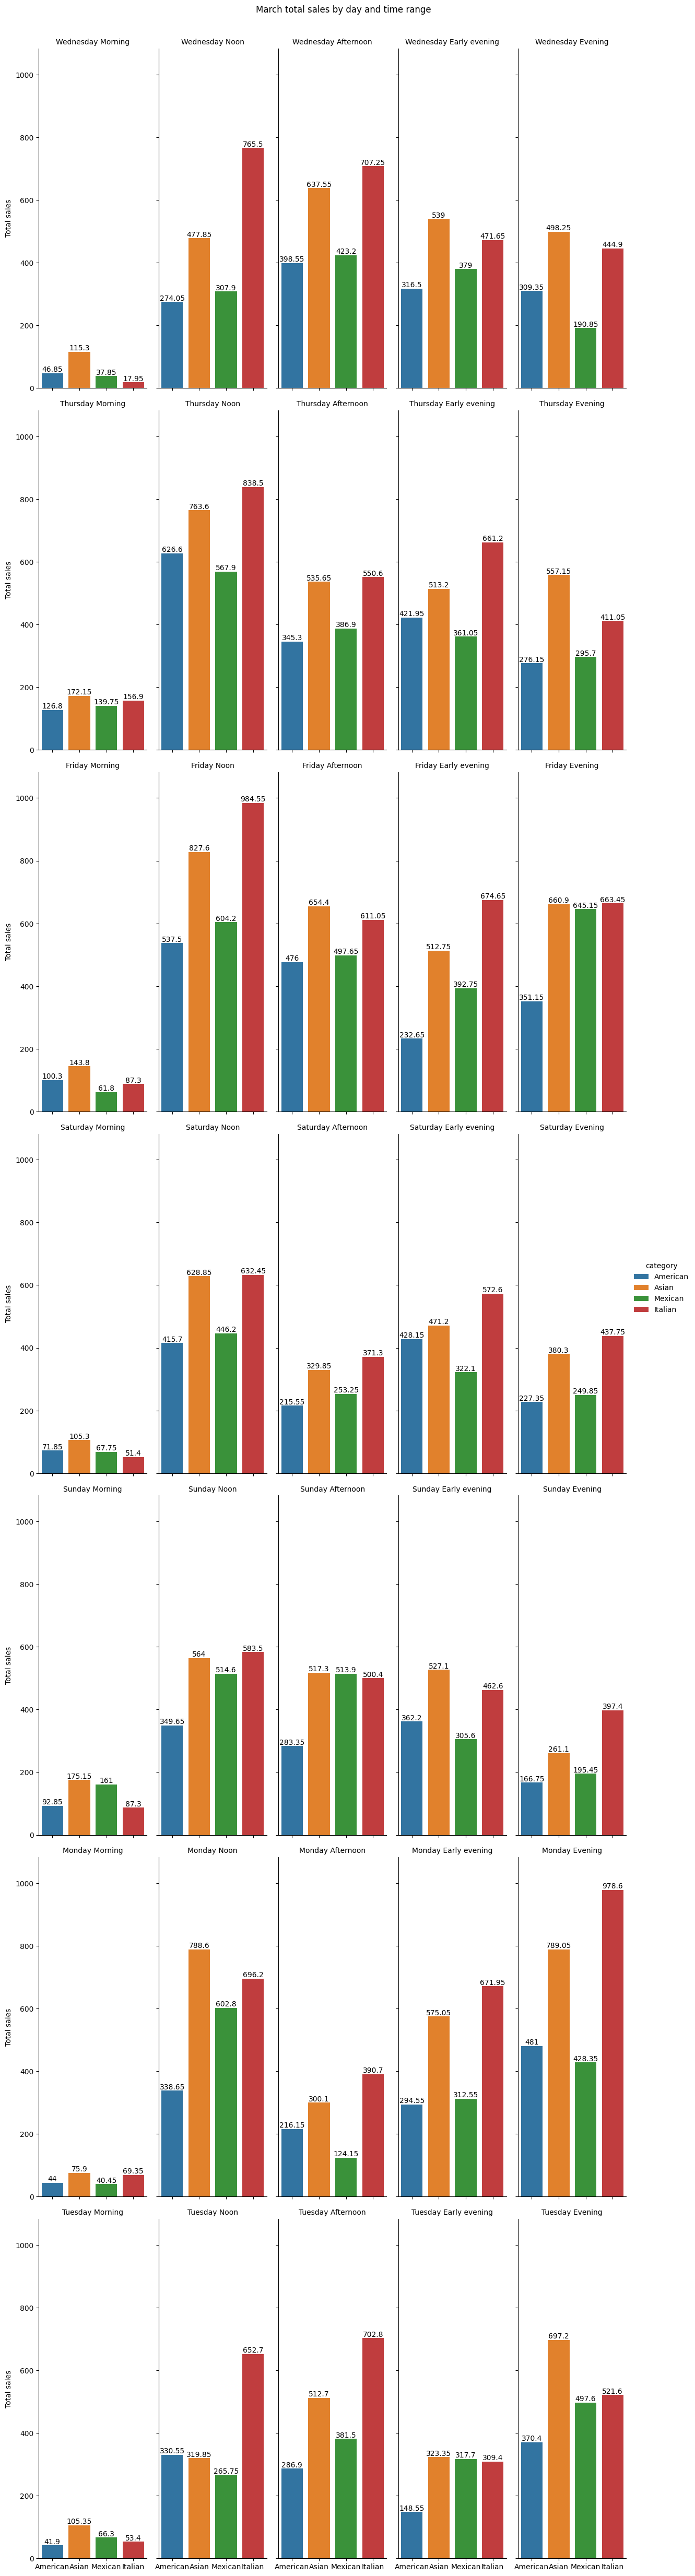

In [29]:
g = sns.catplot(
    data=marzo,
    x="category",
    y="price",
    col="time_range",
    row='day_of_week',
    hue='category',
    kind="bar",
    height=7,
    aspect=.35,
    estimator="sum",
    errorbar=None,
    legend=True
)
g.set_axis_labels("", "Total sales")
g.set_xticklabels(list(marzo.category.unique()))
g.set_titles("{row_name} {col_name}")
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.1)

g.fig.suptitle('March total sales by day and time range', y=1.01)
fig_name = f"march-{datetime.strftime(datetime.now(), format='%d-%m-%y-%H-%M')}"
plt.savefig(fname=f'../figures/{fig_name}.png', format='png', dpi=300)
plt.show()